In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

Реализуйте высокочастотную фильтрацию на основе ядра Гаусса

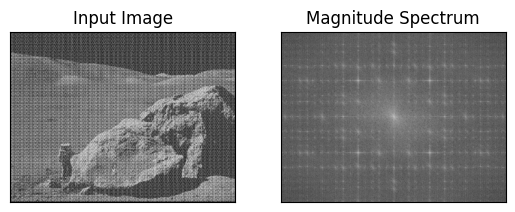

In [13]:
img = cv.imread('periodic_noise.JPG', cv.IMREAD_GRAYSCALE)

dft = cv.dft(np.float32(img), flags = cv.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20*np.log(cv.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

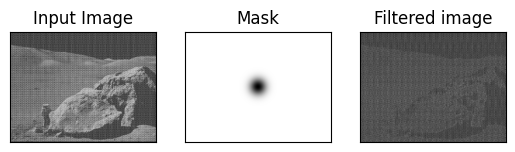

In [14]:
rows, cols = img.shape
center_row, center_col = rows // 2, cols // 2

mask = np.ones((rows, cols, 2), np.float32)

sigma = 30
for i in range(rows):
    for j in range(cols):
        dist = np.sqrt((i - center_row)**2 + (j - center_col)**2)
        mask[i, j, :] = 1 - np.exp(-(dist**2)/(2 * sigma**2))

dft_shift = dft_shift * mask

f_ishift = np.fft.ifftshift(dft_shift)
img_back = cv.idft(f_ishift)
img_back = cv.magnitude(img_back[:,:,0],img_back[:,:,1])
mask_hpf_vis = mask[:,:,0]
plt.subplot(231),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(232),plt.imshow(mask_hpf_vis, cmap = 'gray')
plt.title('Mask'), plt.xticks([]), plt.yticks([])
plt.subplot(233),plt.imshow(img_back, cmap = 'gray')
plt.title('Filtered image'), plt.xticks([]), plt.yticks([])
plt.show()

Реализуйте удаление периодического шума

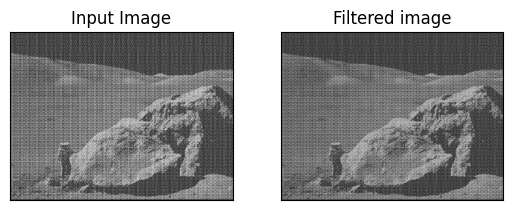

In [19]:
dft = cv.dft(np.float32(img),flags = cv.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20*np.log(cv.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

magnitude_norm = cv.normalize(magnitude_spectrum, None, 0, 255, cv.NORM_MINMAX, cv.CV_8U)

_, thresh = cv.threshold(magnitude_norm, 200, 255, cv.THRESH_BINARY)

peaks = cv.findNonZero(thresh)

rows, cols = img.shape
noise_mask = np.ones((rows, cols, 2), dtype=np.float32)
r = 5

center_row, center_col = cols // 2, rows // 2

if peaks is not None:
    for pt in peaks:
        x, y = pt[0]

        if (x - center_row)**2 + (y - center_col)**2 < r**2:
            continue

        for i in range(rows):
            for j in range(cols):
                if (i - y)**2 + (j - x)**2 < r**2:
                    noise_mask[i, j, :] = 0

dft_shift_filtred = dft_shift * noise_mask

f_ishift = np.fft.ifftshift(dft_shift_filtred)
img_back = cv.idft(f_ishift)
img_back = cv.magnitude(img_back[:,:,0],img_back[:,:,1])
img_back = cv.normalize(img_back, None, 0,255, cv.NORM_MINMAX)
img_back = np.uint8(img_back)

plt.subplot(221),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(img_back, cmap = 'gray')
plt.title('Filtered image'), plt.xticks([]), plt.yticks([])
plt.show()